In [69]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [70]:
import pandas as pd

# Define file paths
file1_path = '../Data/TorrTrials/arp/combinedResult.csv'
file2_path = '../Data/TorrTrials/Dhruv/combinedResult.csv'
file3_path = '../Data/TorrTrials/Prasanna/combinedResult.csv'
file4_path = '../Data/TorrTrials/rnk/combinedResult.csv'
# file5_path = '../Data/TorrTrials/Dharmesh/combinedResult.csv'


# Read each CSV file into a DataFrame
data1 = pd.read_csv(file1_path)
data2 = pd.read_csv(file2_path)
data3 = pd.read_csv(file3_path)
data4 = pd.read_csv(file4_path)
# data5 = pd.read_csv(file5_path)

# Combine all DataFrames
combined_data = pd.concat([data1, data2, data3, data4], ignore_index=True)

In [71]:
# data = load_data()
data = combined_data
data.head()

,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz,Weight
0,14711,754.18,758.27,754.73,757.57,756.19,-215.82,-1025.88,333.01,0.34,...,5.19443,-6.451870,-27.3241,3507.19,-6999.14,2351.19,-256.289,-128.3930,0,70
1,14742,755.85,758.69,754.79,758.29,756.90,-35.64,-990.72,399.90,33.84,...,4.58888,-8.338240,-39.2639,4662.49,-8587.69,2404.75,-218.769,-118.7690,0,70
2,14773,758.30,759.12,754.98,758.66,757.76,109.86,-835.45,577.64,12.05,...,3.95106,-9.704820,-51.2587,5343.89,-9834.87,2809.59,-191.922,-104.2820,0,70
3,14804,761.97,759.41,755.08,759.25,758.93,-91.80,-945.80,397.46,18.98,...,6.34752,-6.923790,-64.8620,5218.11,-10957.00,2539.79,-168.935,-80.4628,0,70
4,14835,765.97,759.53,755.19,759.81,760.13,-111.33,-989.75,360.84,15.03,...,10.56410,-0.225128,-85.8131,5438.89,-12976.90,2298.55,-151.218,-63.3728,0,70


In [72]:
##### removing zero values so that data is not scattered highly

data = data[data['s'] != 0]

# Display the first few rows of the filtered dataset
data.head()

,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz,Weight
0,14711,754.18,758.27,754.73,757.57,756.19,-215.82,-1025.88,333.01,0.34,...,5.19443,-6.451870,-27.3241,3507.19,-6999.14,2351.19,-256.289,-128.3930,0,70
1,14742,755.85,758.69,754.79,758.29,756.90,-35.64,-990.72,399.90,33.84,...,4.58888,-8.338240,-39.2639,4662.49,-8587.69,2404.75,-218.769,-118.7690,0,70
2,14773,758.30,759.12,754.98,758.66,757.76,109.86,-835.45,577.64,12.05,...,3.95106,-9.704820,-51.2587,5343.89,-9834.87,2809.59,-191.922,-104.2820,0,70
3,14804,761.97,759.41,755.08,759.25,758.93,-91.80,-945.80,397.46,18.98,...,6.34752,-6.923790,-64.8620,5218.11,-10957.00,2539.79,-168.935,-80.4628,0,70
4,14835,765.97,759.53,755.19,759.81,760.13,-111.33,-989.75,360.84,15.03,...,10.56410,-0.225128,-85.8131,5438.89,-12976.90,2298.55,-151.218,-63.3728,0,70


In [73]:
data_labels = data["Fz"]
data.drop("Fz", axis=1)

,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,SubFrame,Fx,Fy,Mx,My,Mz,Cx,Cy,Cz,Weight
0,14711,754.18,758.27,754.73,757.57,756.19,-215.82,-1025.88,333.01,0.34,...,0,5.19443,-6.451870,3507.19,-6999.14,2351.19,-256.2890,-128.3930,0,70
1,14742,755.85,758.69,754.79,758.29,756.90,-35.64,-990.72,399.90,33.84,...,0,4.58888,-8.338240,4662.49,-8587.69,2404.75,-218.7690,-118.7690,0,70
2,14773,758.30,759.12,754.98,758.66,757.76,109.86,-835.45,577.64,12.05,...,0,3.95106,-9.704820,5343.89,-9834.87,2809.59,-191.9220,-104.2820,0,70
3,14804,761.97,759.41,755.08,759.25,758.93,-91.80,-945.80,397.46,18.98,...,0,6.34752,-6.923790,5218.11,-10957.00,2539.79,-168.9350,-80.4628,0,70
4,14835,765.97,759.53,755.19,759.81,760.13,-111.33,-989.75,360.84,15.03,...,0,10.56410,-0.225128,5438.89,-12976.90,2298.55,-151.2180,-63.3728,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,68262,826.73,769.61,753.24,757.89,776.87,-26.37,-904.79,511.23,-21.25,...,0,61.99030,94.222200,47072.10,-10015.90,6028.69,-20.5794,-96.7177,0,60
6490,68293,810.97,767.08,752.81,755.64,771.63,-35.64,-939.45,442.38,-67.66,...,0,59.64420,99.068100,44399.00,-9447.16,5669.16,-20.8284,-97.8877,0,60
6491,68324,781.51,762.04,752.79,754.97,762.83,401.37,-1300.29,631.35,-180.43,...,0,50.07000,88.532300,38823.40,-8443.56,4605.61,-22.2958,-102.5160,0,60
6492,68355,759.49,760.21,752.78,754.89,756.84,493.16,-1430.66,713.87,25.69,...,0,27.88060,53.736700,26741.10,-6761.62,2984.31,-29.5444,-116.8370,0,60


In [74]:
data.columns

Index(['currTime', 's1', 's2', 's3', 's4', 's', 'AccX', 'AccY', 'AccZ',
       'GyroX', 'GyroY', 'GyroZ', 'Frame', 'SubFrame', 'Fx', 'Fy', 'Fz', 'Mx',
       'My', 'Mz', 'Cx', 'Cy', 'Cz', 'Weight'],
      dtype='object')

Dimensionality Reduction

In [75]:
data = data.drop(["s", "currTime", "Frame","SubFrame","Fx","Fy","Fz","Mx","My","Mz","Cx","Cy","Cz","AccX","AccY","AccZ","GyroX","GyroY","GyroZ"], axis=1)
data.head()

,s1,s2,s3,s4,Weight
0,754.18,758.27,754.73,757.57,70
1,755.85,758.69,754.79,758.29,70
2,758.30,759.12,754.98,758.66,70
3,761.97,759.41,755.08,759.25,70
4,765.97,759.53,755.19,759.81,70


In [77]:

# 1. Load and Preprocess the Data
# Assuming 'data' is your full DataFrame with both features and labels
features = data[['s1', 's2', 's3', 's4', 'Weight']]
labels = data_labels  # Replace 'Label' with your label column name

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [78]:

# Scale the features for better neural network performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [79]:
X_train.shape[1]

5

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 2. Define the Neural Network Model
# model = Sequential([
#     Dense(128, input_shape=(X_train.shape[1],), activation='relu'),  # More neurons in the first layer
#     Dense(64, activation='relu'),  # Additional layers
#     Dense(32, activation='relu'),
#     Dense(16, activation='relu'),
#     Dense(1, activation='linear')  # Output layer
# ])


model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.001)),  # Increased neurons with L2 regularization
    BatchNormalization(),  # Batch Normalization
    Dropout(0.3),  # Dropout to reduce overfitting
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='linear')  # Output layer for regression
])


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


c:\Users\hcr lab pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


More number of layers

In [10]:
model = Sequential([
    Dense(256, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')  # Output layer for regression
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])


Wide and Deep Neural Network

In [81]:
from tensorflow.keras.layers import Concatenate, Input
from tensorflow.keras.models import Model

input_layer = Input(shape=(X_train.shape[1],))
wide = Dense(64, activation='relu')(input_layer)  # Wide branch
wide = Dense(32, activation='relu')(wide)

deep = Dense(128, activation='relu')(input_layer)  # Deep branch
deep = BatchNormalization()(deep)
deep = Dropout(0.3)(deep)
deep = Dense(64, activation='relu')(deep)
deep = Dense(32, activation='relu')(deep)

# Concatenate wide and deep branches
merged = Concatenate()([wide, deep])
output = Dense(1, activation='linear')(merged)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])


In [14]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 11)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │      1,536 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_12[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 64)        │        768 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64)        │      8,256 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 32)        │      2,080 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 32)        │      2,080 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64)        │          0 │ dense_11[0][0],   │
│ (Concatenate)       │                   │            │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 1)         │         65 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 45,381 (177.27 KB)

 Trainable params: 15,041 (58.75 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 30,084 (117.52 KB)

In [100]:

# 3. Train the Model
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2)


Epoch 1/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 297.0263 - mae: 12.2464 - val_loss: 391.4748 - val_mae: 12.4629
Epoch 2/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 299.0824 - mae: 12.2950 - val_loss: 431.9243 - val_mae: 13.5813
Epoch 3/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 362.0870 - mae: 12.7448 - val_loss: 392.8780 - val_mae: 12.4396
Epoch 4/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 308.0407 - mae: 12.3933 - val_loss: 415.9308 - val_mae: 12.6932
Epoch 5/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 325.2595 - mae: 12.6090 - val_loss: 410.8578 - val_mae: 13.3458
Epoch 6/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 322.2603 - mae: 12.5243 - val_loss: 407.5439 - val_mae: 12.9769
Epoch 7/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 317.5084 - mae: 12.4074 - val_loss: 410.0714 - val_mae: 12.9226
Epoch 8/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 315.5991 - mae: 12.6859 - val_loss: 410.98

Saving Model

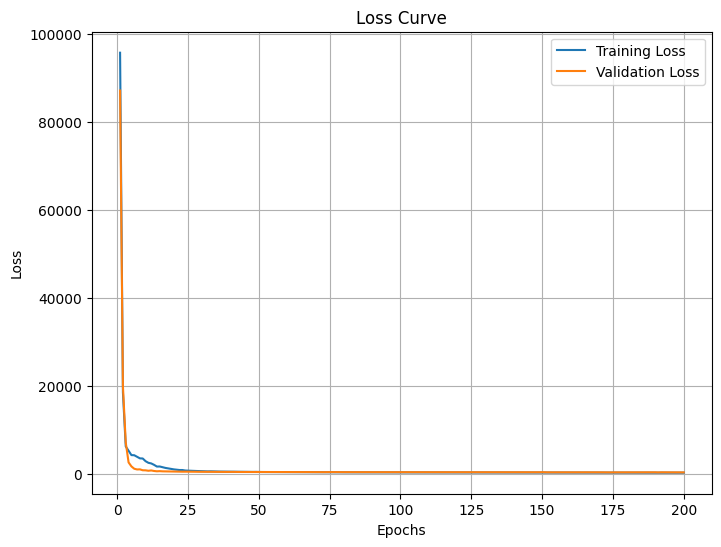

In [83]:
import matplotlib.pyplot as plt

# Extract loss values from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plot the loss curves
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.show()


In [101]:
model.save('../Models/Less_features_thousandEpochs.keras')

Load Model

In [13]:
model = tf.keras.models.load_model('../Models/Thousand_epochs_wide.keras')

In [102]:

# 4. Evaluate the Model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 425.6105 - mae: 12.4766
Test Loss: 416.5946350097656, Test MAE: 12.279939651489258


In [103]:

# 5. Make Predictions
predictions = model.predict(X_test)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step


In [104]:
from sklearn.metrics import r2_score

# Assuming y_test are true values and predictions are model outputs
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2 * 100:.2f}%")


R-squared: 90.80%


In [105]:
import numpy as np

# 1. Select 5 random indices from the test set
random_indices = np.random.choice(len(X_test), size=5, replace=False)

# 2. Get the corresponding data points and actual values
X_sample = X_test[random_indices]
y_actual = y_test.iloc[random_indices]

# 3. Make predictions on these data points
y_pred = model.predict(X_sample)

# 4. Print predictions and actual values for comparison
print("Predictions vs Actual Values:\n")
for i, (pred, actual) in enumerate(zip(y_pred, y_actual)):
    print(f"Data Point {i+1}: Predicted = {pred[0]:.2f}, Actual = {actual:.2f}")

# 5. Alternatively, print them in list format for a clear visual comparison
print("\nPredicted values:", y_pred.flatten())
print("Actual values:", y_actual.values)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predictions vs Actual Values:

Data Point 1: Predicted = -288.43, Actual = -257.12
Data Point 2: Predicted = -360.13, Actual = -366.45
Data Point 3: Predicted = -344.77, Actual = -336.50
Data Point 4: Predicted = -201.83, Actual = -180.41
Data Point 5: Predicted = -208.82, Actual = -187.67

Predicted values: [-288.42715 -360.12994 -344.7721  -201.82541 -208.81654]
Actual values: [-257.12  -366.447 -336.501 -180.406 -187.666]


Complete experiment plot

In [106]:
new_exp = '../Data/TorrTrials/Dharmesh/combinedResult.csv'

In [107]:
exp1 = pd.read_csv(new_exp)
exp1.head()

,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz,Weight
0,10933,753.11,767.04,757.07,760.07,759.32,-41.50,-1004.39,252.93,33.02,...,2.99292,2.70722,-27.4957,242.428,-1332.24,86.8712,-547.447,-8.83537,0,72
1,10964,753.13,767.57,757.27,760.87,759.71,-71.78,-997.56,300.78,34.79,...,5.38603,4.27523,-36.2130,364.264,-1485.87,81.7844,-540.031,-10.05760,0,72
2,10995,753.92,768.25,757.74,761.84,760.44,-159.67,-829.59,600.59,33.80,...,8.63440,2.88159,-46.3032,621.342,-1724.26,438.9400,-536.261,-13.41550,0,72
3,11026,755.37,769.40,758.10,762.51,761.34,-114.26,-870.61,553.22,53.29,...,12.40370,3.39761,-61.0527,949.118,-1867.05,598.1720,-529.581,-15.53750,0,72
4,11056,757.14,771.00,758.35,762.89,762.34,-18.07,-918.46,462.89,26.05,...,12.95860,1.86141,-86.5583,2992.850,-2993.11,387.1560,-533.571,-34.55330,0,72


In [108]:
exp_labels = exp1["Fz"]
exp1.drop("Fz", axis=1)

,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,SubFrame,Fx,Fy,Mx,My,Mz,Cx,Cy,Cz,Weight
0,10933,753.11,767.04,757.07,760.07,759.32,-41.50,-1004.39,252.93,33.02,...,0,2.99292,2.707220,242.428,-1332.24,86.8712,-547.447,-8.83537,0,72
1,10964,753.13,767.57,757.27,760.87,759.71,-71.78,-997.56,300.78,34.79,...,0,5.38603,4.275230,364.264,-1485.87,81.7844,-540.031,-10.05760,0,72
2,10995,753.92,768.25,757.74,761.84,760.44,-159.67,-829.59,600.59,33.80,...,0,8.63440,2.881590,621.342,-1724.26,438.9400,-536.261,-13.41550,0,72
3,11026,755.37,769.40,758.10,762.51,761.34,-114.26,-870.61,553.22,53.29,...,0,12.40370,3.397610,949.118,-1867.05,598.1720,-529.581,-15.53750,0,72
4,11056,757.14,771.00,758.35,762.89,762.34,-18.07,-918.46,462.89,26.05,...,0,12.95860,1.861410,2992.850,-2993.11,387.1560,-533.571,-34.55330,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,35956,756.15,770.63,757.88,758.22,760.72,104.49,-937.01,400.88,-42.48,...,0,25.04070,5.538690,6530.250,-5183.30,-128.7930,-530.173,-39.23000,0,72
810,35987,755.33,769.78,757.18,757.80,760.02,568.36,-1003.42,554.69,-26.67,...,0,12.48910,0.276389,1863.600,-3164.54,-602.3670,-530.146,-18.26620,0,72
811,36017,755.39,769.34,757.06,757.72,759.88,421.39,-1065.92,518.07,-5.44,...,0,4.92244,-5.514560,159.553,-1480.79,-310.7540,-529.032,-3.26793,0,72
812,41148,793.65,776.17,758.48,764.39,773.17,-40.04,-895.02,513.67,1.44,...,0,0.00000,0.000000,0.000,0.00,0.0000,-499.000,0.00000,0,72


In [109]:
exp1 = exp1.drop(["s", "currTime", "Frame","SubFrame","Fx","Fy","Fz","Mx","My","Mz","Cx","Cy","Cz","AccX","AccY","AccZ","GyroX","GyroY","GyroZ"], axis=1)
exp1.head()

,s1,s2,s3,s4,Weight
0,753.11,767.04,757.07,760.07,72
1,753.13,767.57,757.27,760.87,72
2,753.92,768.25,757.74,761.84,72
3,755.37,769.40,758.10,762.51,72
4,757.14,771.00,758.35,762.89,72


In [110]:
exp1 = scaler.fit_transform(exp1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step


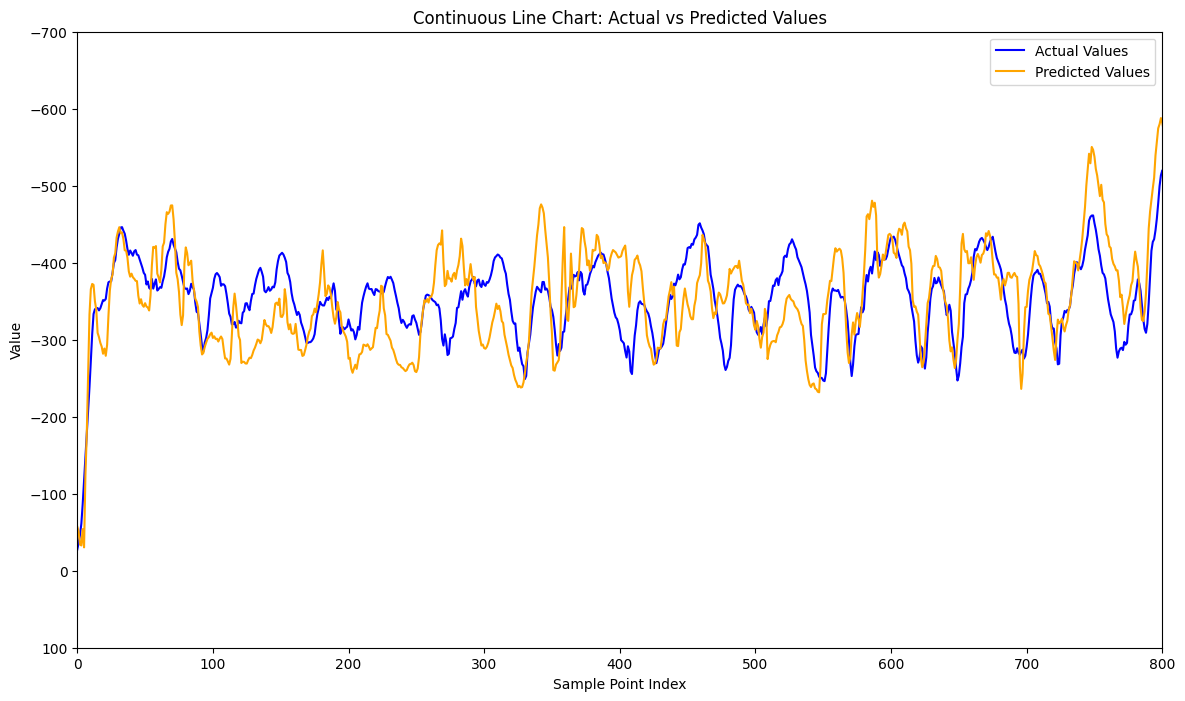

In [112]:
# Predicting for the entire test set
y_test_actual = exp_labels.values.flatten()  # Actual values from the test set
y_test_pred = model.predict(exp1).flatten()  # Predicted values for the entire test set

# Plotting actual vs predicted values as continuous lines
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(y_test_actual, label="Actual Values", color='blue', linestyle='-', linewidth=1.5)
plt.plot(y_test_pred, label="Predicted Values", color='orange', linestyle='-', linewidth=1.5)
plt.xlabel("Sample Point Index")
plt.ylabel("Value")
plt.xlim(0, 800)
plt.ylim(100,-700)
plt.title("Continuous Line Chart: Actual vs Predicted Values")
plt.legend()
plt.show()


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_actual, y_test_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_actual, y_test_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R²)
r2 = r2_score(y_test_actual, y_test_pred)

# Print validation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 132.6981
Mean Squared Error (MSE): 20713.3433
Root Mean Squared Error (RMSE): 143.9213
R-squared (R²): 0.0420


In [42]:
from tensorflow.keras.utils import plot_model

# Visualize model architecture
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_architecture.png')


You must install pydot (`pip install pydot`) for `plot_model` to work.
